# Generating Qubit Hamiltonians


In [1]:
from utility import *

# H$_2$

Specify the Qubit Hamiltonian of a molecule by its name, internuclear distances, basis set, and fermion-to-qubit transformation. Here, we show the resulting Hamiltonian for $H_2$ in STO-3G with $1\overset{\circ}{A}$ between the $H$ atoms.

In [2]:
qubit_transf = 'jw' # Jordan-Wigner transformations
h2 = get_qubit_hamiltonian(mol='h2', geometry=1, basis='sto3g', qubit_transf=qubit_transf)
print(h2)

-0.3276081896748089 [] +
-0.04919764587136759 [X0 X1 Y2 Y3] +
0.04919764587136759 [X0 Y1 Y2 X3] +
0.04919764587136759 [Y0 X1 X2 Y3] +
-0.04919764587136759 [Y0 Y1 X2 X3] +
0.13716572937099494 [Z0] +
0.15660062488237958 [Z0 Z1] +
0.10622904490856085 [Z0 Z2] +
0.15542669077992843 [Z0 Z3] +
0.13716572937099494 [Z1] +
0.15542669077992843 [Z1 Z2] +
0.10622904490856085 [Z1 Z3] +
-0.1303629205710914 [Z2] +
0.1632676867356435 [Z2 Z3] +
-0.13036292057109133 [Z3]




Alternatively, the qubit-tapering technique can find a smaller effective Hamitlonian by subsitituting operators with $\pm 1$. This technique is detailed in Bravyi's work ([Bravyi et al., "Tapering off qubits to simulate fermionic Hamiltonians", arXiv:1701.08213](https://arxiv.org/abs/1701.08213)).


In [3]:
print("The effective Hamiltonian:\n {}".format(taper_hamiltonian(h2, n_spin_orbitals=4, n_electrons=2, qubit_transf=qubit_transf)))

The effective Hamiltonian:
 -0.5310513494337643 [] +
0.19679058348547035 [X0] +
-0.5350572998841726 [Z0]




We can verify that this new Hamiltonian indeed includes the ground state.


In [4]:
print("The ground state energy:")
obtain_PES('h2', [1], 'sto-3g', 'fci')

# Building the matrix representation of the effective Hamiltonian
I, X, Z = np.identity(2), np.array([[0, 1], [1, 0]]), np.array([[1, 0], [0, -1]])
h2_matrix = -0.53105134 * I + 0.19679058 * X - 0.53505729 * Z

# Obtain the eigenvalues
eigvals, _ = np.linalg.eigh(h2_matrix)
print("\nThe eigenvalues in the effective Hamiltonian: \n {}".format(eigvals))

The ground state energy:
E = -1.1011503301329566 Eh

The eigenvalues in the effective Hamiltonian: 
 [-1.10115031  0.03904763]


E = -1.0551597946880178 Eh
E = -1.1284622392521424 Eh
E = -1.135324717942807 Eh
E = -1.1154333215192842 Eh
E = -1.085591462636164 Eh
E = -1.0535802485981933 Eh
E = -1.023649897162354 Eh
E = -0.9981492860961144 Eh
E = -0.9779958944742693 Eh
E = -0.963051385110496 Eh
E = -0.9525449013982779 Eh
E = -0.9454668455477824 Eh
E = -0.9408488128854151 Eh
E = -0.9379036275943807 Eh
E = -0.9360549199436612 Eh


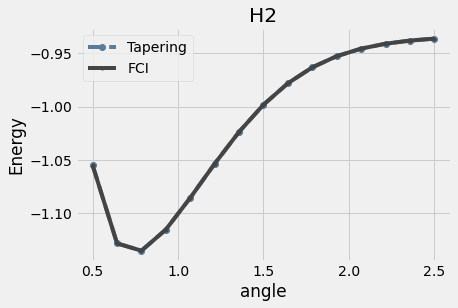

In [7]:
from openfermion.utils import eigenspectrum

prec = 15
qubit_transf = 'jw' # Jordan-Wigner transformations
angles = np.linspace(0.5, 2.5, prec)
energy_fci = obtain_PES('h2', angles, 'sto-3g', 'fci')

energy_tap = np.zeros(prec)
for i in range(prec):
    h2 = get_qubit_hamiltonian(mol='h2', geometry=angles[i], basis='sto3g', qubit_transf=qubit_transf)
    h = taper_hamiltonian(h2, n_spin_orbitals=4, n_electrons=2, qubit_transf=qubit_transf)
    energy_tap[i] = eigenspectrum(h)[0]
    
  
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')


plt.plot(angles, energy_tap, color='#5a7d9a', linestyle='--', marker='o', label='Tapering')
plt.plot(angles, energy_fci, color='#444444', linestyle='-', marker='.', label='FCI')


plt.xlabel('angle')
plt.ylabel('Energy')
plt.title('H2')

plt.legend()
plt.grid(True)

We can see this approximation gives good results for the H$_2$ molecule.